In [66]:
from easyimages import EasyImageList
l = EasyImageList.from_folder('gwhd_2021/images/')
l.html(sample=40, size=500)

In [172]:
import pandas as pd
import numpy as np
bbox_df = pd.read_csv('gwhd_2021/competition_test.csv')

bbox_df = bbox_df.assign(Box=bbox_df['BoxesString'].str.split(';')).explode('Box').reset_index(drop=True)
bbox_df = bbox_df[bbox_df['Box'] != 'no_box']
box_to_columns = bbox_df['Box'].str.split(' ')
box_to_columns = list(zip(*box_to_columns))
bbox_df['x_min'], bbox_df['y_min'], bbox_df['x_max'], bbox_df['y_max'] = box_to_columns
bbox_df[['x_max', 'x_min', 'y_min', 'y_max']] = bbox_df[['x_max', 'x_min', 'y_min', 'y_max']].astype(int)
bbox_df

,image_name,BoxesString,domain,Box,x_min,y_min,x_max,y_max
0,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,481 820 604 922,481,820,604,922
1,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,655 957 732 1024,655,957,732,1024
2,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,930 926 1013 1024,930,926,1013,1024
3,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,809 851 910 924,809,851,910,924
4,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,836 904 866 967,836,904,866,967
...,...,...,...,...,...,...,...,...
67473,6eeb8859956a3797f72bc8449b1c526deeacf6af3dbef1...,78 816 183 922;180 815 245 920;417 802 525 100...,ARC_1,142 245 235 361,142,245,235,361
67474,6eeb8859956a3797f72bc8449b1c526deeacf6af3dbef1...,78 816 183 922;180 815 245 920;417 802 525 100...,ARC_1,460 0 540 53,460,0,540,53
67475,6eeb8859956a3797f72bc8449b1c526deeacf6af3dbef1...,78 816 183 922;180 815 245 920;417 802 525 100...,ARC_1,165 197 235 270,165,197,235,270
67476,6eeb8859956a3797f72bc8449b1c526deeacf6af3dbef1...,78 816 183 922;180 815 245 920;417 802 525 100...,ARC_1,281 0 341 41,281,0,341,41


In [183]:
bbox_df['Width'] = bbox_df['x_max'] - bbox_df['x_min']
bbox_df['Height'] = bbox_df['y_max'] - bbox_df['y_min']
#bbox_df['AspectRatio'] = bbox_df['Height'] / bbox_df['Width'] if bbox_df['Width'] > bbox_df['Height'] else bbox_df['Width'] / bbox_df['Height']
bbox_df['AspectRatio'] = pd.Series()
bbox_df.loc[bbox_df['Height'] >= bbox_df['Width'], 'AspectRatio'] = bbox_df['Width'] / bbox_df['Height']
bbox_df.loc[bbox_df['Width'] > bbox_df['Height'], 'AspectRatio'] = bbox_df['Height'] / bbox_df['Width']
bbox_df['Area'] = bbox_df['Height'] * bbox_df['Width']
bbox_df

/tmp/ipykernel_201036/1434471762.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bbox_df['AspectRatio'] = pd.Series()


,image_name,BoxesString,domain,Box,x_min,y_min,x_max,y_max,Width,Height,AspectRatio,Area
0,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,481 820 604 922,481,820,604,922,123,102,0.829268,12546
1,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,655 957 732 1024,655,957,732,1024,77,67,0.870130,5159
2,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,930 926 1013 1024,930,926,1013,1024,83,98,0.846939,8134
3,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,809 851 910 924,809,851,910,924,101,73,0.722772,7373
4,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7,836 904 866 967,836,904,866,967,30,63,0.476190,1890
...,...,...,...,...,...,...,...,...,...,...,...,...
67473,6eeb8859956a3797f72bc8449b1c526deeacf6af3dbef1...,78 816 183 922;180 815 245 920;417 802 525 100...,ARC_1,142 245 235 361,142,245,235,361,93,116,0.801724,10788
67474,6eeb8859956a3797f72bc8449b1c526deeacf6af3dbef1...,78 816 183 922;180 815 245 920;417 802 525 100...,ARC_1,460 0 540 53,460,0,540,53,80,53,0.662500,4240
67475,6eeb8859956a3797f72bc8449b1c526deeacf6af3dbef1...,78 816 183 922;180 815 245 920;417 802 525 100...,ARC_1,165 197 235 270,165,197,235,270,70,73,0.958904,5110
67476,6eeb8859956a3797f72bc8449b1c526deeacf6af3dbef1...,78 816 183 922;180 815 245 920;417 802 525 100...,ARC_1,281 0 341 41,281,0,341,41,60,41,0.683333,2460


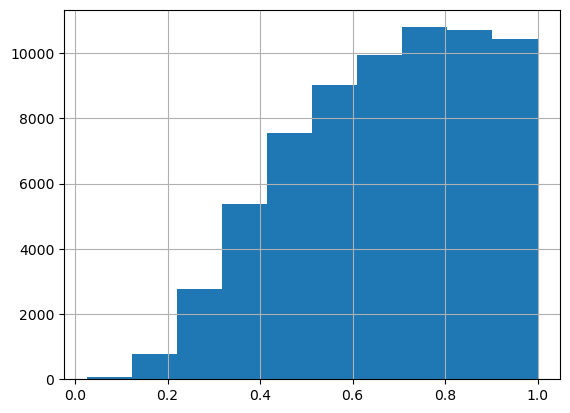

<Axes: >

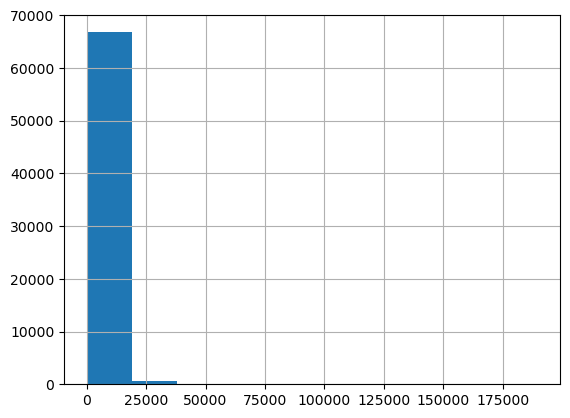

In [194]:
from matplotlib import pyplot as plt
%matplotlib inline
bbox_df['AspectRatio'].hist()
plt.show() # what
bbox_df['Area'].hist()